<a href="https://colab.research.google.com/github/AgustinCdeCelis/Cancer-Logistic-Regression/blob/main/cancer_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px


In [2]:
link ='https://raw.githubusercontent.com/AgustinCdeCelis/Cancer-Logistic-Regression/main/data.csv'

In [3]:
disease_df= pd.read_csv(link)

In [4]:
disease_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


Attribute Information:

ID number

1.   ID NUMBER
2.   Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness(local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symetry
10. fractal dimension ("coastline approximation" -1)



In [5]:
disease_df.info()
#eliminamos el Id porque consideramos que es irrelevante y la última columna porque tiene todos null-values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
disease_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
disease_df= disease_df.drop(columns=['id','Unnamed: 32'])

In [8]:
disease_df['diagnosis'].unique()
#Las categorias de la variable target

array(['M', 'B'], dtype=object)

In [9]:
#from sklearn.preprocessing import LabelEncoder

In [10]:
#label= LabelEncoder()

In [11]:
#disease_df['diagnosis'] = label.fit_transform(disease_df['diagnosis'])

In [12]:
#disease_df

Maligno = 1
Benigno = 0

Seleccionar Target y Features

In [13]:
target = 'diagnosis'

In [14]:
features = list(disease_df.columns)[1:]

In [15]:
features

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

Select the sizes of the Dataset

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_val_df , test_df = train_test_split(disease_df, test_size =0.1, random_state =42)

In [18]:
train_df , val_df = train_test_split(train_val_df,test_size =0.15,random_state =42)

In [19]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(435, 31)
(77, 31)
(57, 31)


In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model = LogisticRegression(solver='liblinear')


In [22]:
model.fit(train_df[features],train_df[target])

LogisticRegression(solver='liblinear')

In [23]:
print("los coeficientes de cada variable son ",list(model.coef_))
print("el intercept es ",model.intercept_)

los coeficientes de cada variable son  [array([-2.17782941, -0.12354744,  0.01244226,  0.00852733,  0.11449509,
        0.40644995,  0.60871992,  0.31130347,  0.1543516 ,  0.02411085,
        0.00970977, -1.49205361, -0.31283553,  0.1275416 ,  0.01512998,
        0.04752976,  0.08932654,  0.04070627,  0.0504515 ,  0.0038237 ,
       -1.39717009,  0.41241713,  0.1776925 ,  0.02093332,  0.23411843,
        1.15683791,  1.55277252,  0.58277202,  0.65540794,  0.11452835])]
el intercept es  [-0.43614915]


In [24]:
train_preds = model.predict(train_df[features])

In [25]:
train_preds

array(['M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B

In [26]:
train_df[target]

566    M
236    M
482    B
480    B
386    B
      ..
355    B
97     B
159    B
537    B
428    B
Name: diagnosis, Length: 435, dtype: object

In [27]:
train_probs = model.predict_proba(train_df[features])

In [28]:
train_probs

array([[8.82345089e-04, 9.99117655e-01],
       [0.00000000e+00, 1.00000000e+00],
       [9.98827175e-01, 1.17282511e-03],
       [9.72874583e-01, 2.71254170e-02],
       [9.96895654e-01, 3.10434615e-03],
       [9.04786639e-02, 9.09521336e-01],
       [8.98896817e-01, 1.01103183e-01],
       [2.96667579e-09, 9.99999997e-01],
       [9.93876753e-01, 6.12324707e-03],
       [7.73361544e-04, 9.99226638e-01],
       [6.38178098e-01, 3.61821902e-01],
       [1.44730672e-10, 1.00000000e+00],
       [9.96411373e-01, 3.58862666e-03],
       [1.10266210e-02, 9.88973379e-01],
       [9.97060445e-01, 2.93955509e-03],
       [9.90362336e-01, 9.63766367e-03],
       [2.18928239e-02, 9.78107176e-01],
       [1.00186526e-12, 1.00000000e+00],
       [9.69229701e-01, 3.07702985e-02],
       [5.55204855e-04, 9.99444795e-01],
       [9.75487649e-01, 2.45123508e-02],
       [9.98927413e-01, 1.07258722e-03],
       [9.95598471e-01, 4.40152921e-03],
       [8.88178420e-16, 1.00000000e+00],
       [1.067974

In [29]:
model.classes_

array(['B', 'M'], dtype=object)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(train_df[target],train_preds)

0.9632183908045977

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
confusion_matrix(train_df[target],train_preds,normalize='true')

array([[0.98120301, 0.01879699],
       [0.06508876, 0.93491124]])

In [34]:
def predic_plot(input,target, name=''):
    
    pred= model.predict(input)
    accuracy = accuracy_score(target,pred)*100
    print('The Accuracy of the model is', accuracy.round(2))
    cm=confusion_matrix(target,pred,normalize='true')
    matplotlib.rcParams['figure.figsize'] =12,8
    plt.title('{} Confusion Matrix'.format(name))
    
    sns.set_style('darkgrid')
    
    sns.heatmap(cm,annot=True)
    return pred

The Accuracy of the model is 96.32


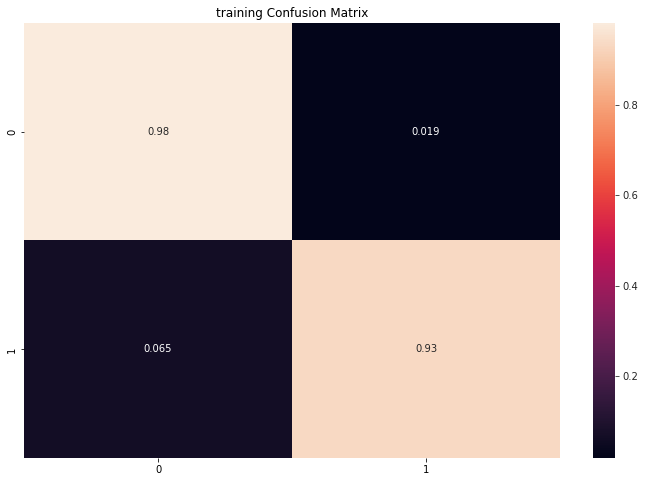

In [35]:
train_preds = predic_plot(train_df[features],train_df[target], 'training')

The Accuracy of the model is 92.21


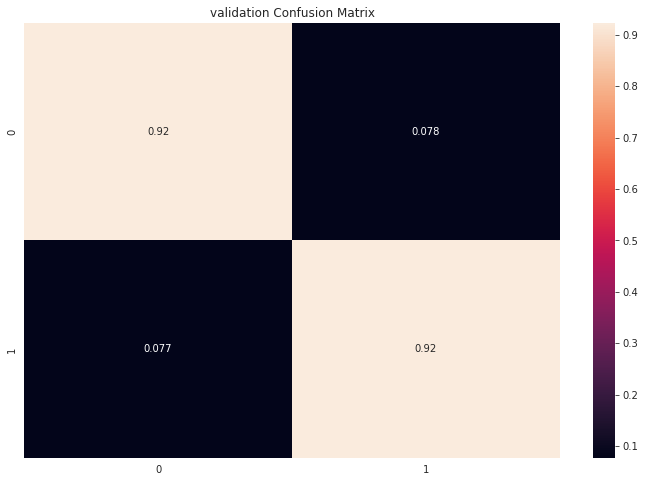

In [36]:
val_preds = predic_plot(val_df[features],val_df[target],'validation')

The Accuracy of the model is 98.25


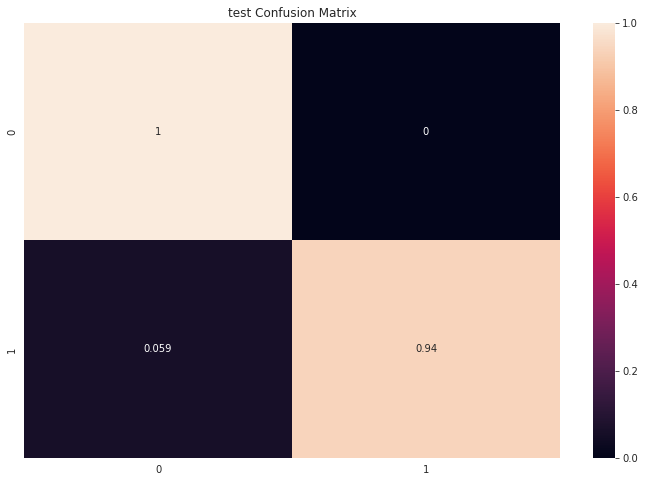

In [37]:
test_preds = predic_plot(test_df[features],test_df[target],'test')

Vamos a escalas los features

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
?MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [41]:
scaler.fit(disease_df[features])

MinMaxScaler()

In [42]:
scaler.data_max_

array([2.811e+01, 3.928e+01, 1.885e+02, 2.501e+03, 1.634e-01, 3.454e-01,
       4.268e-01, 2.012e-01, 3.040e-01, 9.744e-02, 2.873e+00, 4.885e+00,
       2.198e+01, 5.422e+02, 3.113e-02, 1.354e-01, 3.960e-01, 5.279e-02,
       7.895e-02, 2.984e-02, 3.604e+01, 4.954e+01, 2.512e+02, 4.254e+03,
       2.226e-01, 1.058e+00, 1.252e+00, 2.910e-01, 6.638e-01, 2.075e-01])

In [43]:
scaler.data_min_

array([6.981e+00, 9.710e+00, 4.379e+01, 1.435e+02, 5.263e-02, 1.938e-02,
       0.000e+00, 0.000e+00, 1.060e-01, 4.996e-02, 1.115e-01, 3.602e-01,
       7.570e-01, 6.802e+00, 1.713e-03, 2.252e-03, 0.000e+00, 0.000e+00,
       7.882e-03, 8.948e-04, 7.930e+00, 1.202e+01, 5.041e+01, 1.852e+02,
       7.117e-02, 2.729e-02, 0.000e+00, 0.000e+00, 1.565e-01, 5.504e-02])

In [44]:
disease_df[features] = scaler.transform(disease_df[features])

In [45]:
disease_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,M,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,M,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,M,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,M,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,M,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,M,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,M,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [46]:
train_val_df, test_df = train_test_split(disease_df,test_size=0.2,random_state = 42)

In [47]:
train_df, val_df = train_test_split(disease_df,test_size=0.25,random_state=42)

In [48]:
train_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
287,B,0.279663,0.115320,0.263285,0.157964,0.152749,0.054935,0.052952,0.058201,0.139899,...,0.202419,0.093817,0.184222,0.096294,0.165027,0.084806,0.094728,0.184399,0.146659,0.092549
512,M,0.303800,0.365573,0.309930,0.175270,0.523337,0.391142,0.338566,0.406163,0.533333,...,0.301672,0.470149,0.313213,0.162013,0.569438,0.347634,0.407827,0.704811,0.398186,0.366391
402,B,0.282976,0.290159,0.279110,0.161909,0.188499,0.182842,0.095056,0.093588,0.411111,...,0.220562,0.335554,0.228597,0.107329,0.146074,0.198417,0.128115,0.227079,0.323674,0.114325
446,M,0.509679,0.619547,0.507981,0.355504,0.427372,0.343599,0.397844,0.412177,0.329798,...,0.483814,0.706823,0.473081,0.307658,0.455194,0.338514,0.511102,0.676976,0.277351,0.234225
210,M,0.643618,0.420358,0.628222,0.486320,0.345491,0.354027,0.384255,0.475199,0.356061,...,0.544646,0.421642,0.537328,0.361483,0.307931,0.256823,0.308387,0.659794,0.264932,0.023678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,B,0.090255,0.166723,0.103656,0.042630,0.408053,0.410159,0.201640,0.142744,0.425253,...,0.064141,0.097281,0.060511,0.024381,0.327082,0.209865,0.114537,0.164467,0.135817,0.349993
106,B,0.220503,0.291512,0.216847,0.114104,0.555836,0.252500,0.165651,0.173211,0.374242,...,0.185343,0.459488,0.174810,0.082703,0.644720,0.231598,0.229473,0.418557,0.244628,0.235668
270,B,0.345923,0.240446,0.321401,0.207466,0.105263,0.022606,0.016987,0.031064,0.226263,...,0.248310,0.230011,0.219284,0.122739,0.095754,0.022383,0.030879,0.114536,0.176030,0.040404
435,M,0.331251,0.335137,0.327068,0.193425,0.481809,0.288080,0.263824,0.321223,0.307576,...,0.324084,0.500533,0.316201,0.168133,0.595192,0.319692,0.325000,0.627835,0.318155,0.330972


In [49]:
model = LogisticRegression(solver='liblinear')

In [50]:
model.fit(train_df[features],train_df[target])

LogisticRegression(solver='liblinear')

In [51]:
print('los coeficientes del modelo',model.coef_.tolist())
print('el intercept del modelo', model.intercept_)

los coeficientes del modelo [[0.7119638729065526, 0.9207610941705392, 0.7713419551961217, 1.0286851105465595, -0.26298142100524574, 0.3853941155687755, 1.7301807202679962, 2.3889644128047887, -0.28167392681722725, -1.3503159059461016, 1.2095965897295744, -0.3746604193042023, 0.8796275334990064, 0.8474659988620882, -0.3714822765126035, -0.6852663021944482, -0.3126601580214879, -0.13135350632490048, -0.5080381318935262, -0.6793734122874409, 1.5467285086612201, 1.5168941885233673, 1.3925271112498556, 1.3999054798286457, 0.6919991393536488, 0.7421475705951017, 1.3678049857809396, 2.253888604131343, 0.9919924365051627, 0.13886034556056231]]
el intercept del modelo [-5.3345245]


In [52]:
train_preds = model.predict(train_df[features])
train_preds

array(['B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B

In [ ]:
model.predict_proba(train_df[features])

In [54]:
accuracy_score(train_preds,train_df[target])

0.9671361502347418

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
confusion_matrix(train_df[target],train_preds,normalize='true')

array([[0.99253731, 0.00746269],
       [0.07594937, 0.92405063]])

In [57]:
def predic_plot(feature,target,name=''):
    
    preds=model.predict(feature)
    
    accuracy= accuracy_score(preds,target)
    accuracy = accuracy*100
    print("the acurracy of the model is" , accuracy.round(2))
    
    plt.title('{}confusion matrix'.format(name))
    sns.heatmap(confusion_matrix(target,preds,normalize='true'),annot=True)

    return preds    

In [65]:
model.classes_

array(['B', 'M'], dtype=object)

the acurracy of the model is 96.71


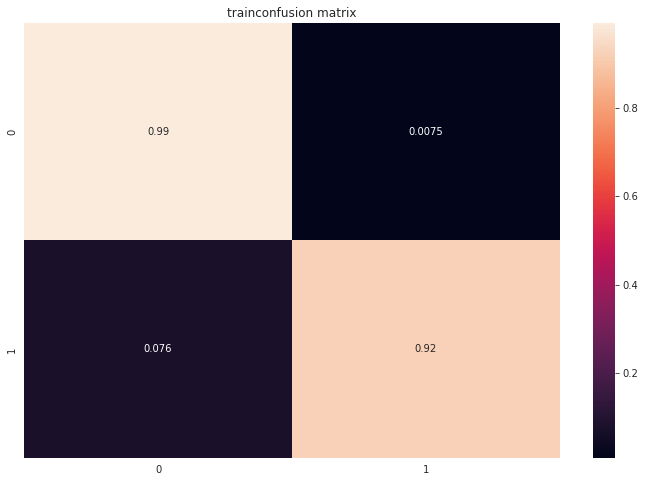

In [58]:
train_preds = predic_plot(train_df[features],train_df[target], "train")

the acurracy of the model is 97.2


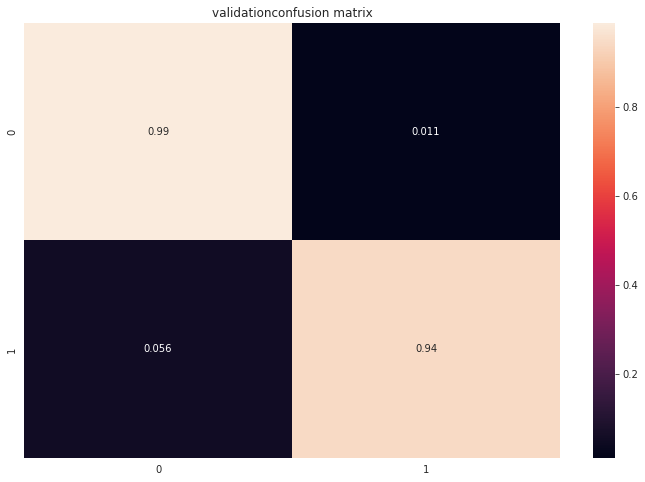

In [59]:
val_preds= predic_plot(val_df[features],val_df[target],'validation')

In [60]:
train_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
287,B,0.279663,0.115320,0.263285,0.157964,0.152749,0.054935,0.052952,0.058201,0.139899,...,0.202419,0.093817,0.184222,0.096294,0.165027,0.084806,0.094728,0.184399,0.146659,0.092549
512,M,0.303800,0.365573,0.309930,0.175270,0.523337,0.391142,0.338566,0.406163,0.533333,...,0.301672,0.470149,0.313213,0.162013,0.569438,0.347634,0.407827,0.704811,0.398186,0.366391
402,B,0.282976,0.290159,0.279110,0.161909,0.188499,0.182842,0.095056,0.093588,0.411111,...,0.220562,0.335554,0.228597,0.107329,0.146074,0.198417,0.128115,0.227079,0.323674,0.114325
446,M,0.509679,0.619547,0.507981,0.355504,0.427372,0.343599,0.397844,0.412177,0.329798,...,0.483814,0.706823,0.473081,0.307658,0.455194,0.338514,0.511102,0.676976,0.277351,0.234225
210,M,0.643618,0.420358,0.628222,0.486320,0.345491,0.354027,0.384255,0.475199,0.356061,...,0.544646,0.421642,0.537328,0.361483,0.307931,0.256823,0.308387,0.659794,0.264932,0.023678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,B,0.090255,0.166723,0.103656,0.042630,0.408053,0.410159,0.201640,0.142744,0.425253,...,0.064141,0.097281,0.060511,0.024381,0.327082,0.209865,0.114537,0.164467,0.135817,0.349993
106,B,0.220503,0.291512,0.216847,0.114104,0.555836,0.252500,0.165651,0.173211,0.374242,...,0.185343,0.459488,0.174810,0.082703,0.644720,0.231598,0.229473,0.418557,0.244628,0.235668
270,B,0.345923,0.240446,0.321401,0.207466,0.105263,0.022606,0.016987,0.031064,0.226263,...,0.248310,0.230011,0.219284,0.122739,0.095754,0.022383,0.030879,0.114536,0.176030,0.040404
435,M,0.331251,0.335137,0.327068,0.193425,0.481809,0.288080,0.263824,0.321223,0.307576,...,0.324084,0.500533,0.316201,0.168133,0.595192,0.319692,0.325000,0.627835,0.318155,0.330972


In [61]:
val_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
204,B,0.259785,0.300643,0.257757,0.143542,0.424483,0.265076,0.187559,0.189911,0.436869,...,0.250445,0.336354,0.227302,0.121092,0.471703,0.204238,0.213339,0.348797,0.285630,0.212908
70,M,0.565999,0.392289,0.551517,0.418452,0.338178,0.256181,0.253046,0.395179,0.263636,...,0.602277,0.388060,0.575178,0.413095,0.317837,0.200163,0.214617,0.614777,0.194362,0.071166
131,M,0.401297,0.330402,0.400180,0.256797,0.510698,0.315686,0.343486,0.401938,0.439899,...,0.403059,0.372601,0.370985,0.238596,0.550948,0.205790,0.302796,0.520275,0.250739,0.164961
431,B,0.256472,0.269530,0.260383,0.137561,0.476393,0.344212,0.181373,0.139115,0.379293,...,0.176094,0.290245,0.195229,0.081252,0.487552,0.228590,0.191933,0.253265,0.195348,0.252853
540,B,0.215770,0.159959,0.213254,0.110032,0.426198,0.284093,0.157849,0.128926,0.382828,...,0.154038,0.204158,0.141292,0.066998,0.418213,0.179013,0.143530,0.237732,0.150601,0.172504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,B,0.362488,0.187014,0.359201,0.215652,0.546809,0.351267,0.233505,0.351093,0.533333,...,0.299182,0.165778,0.293790,0.151986,0.373308,0.273219,0.207987,0.480069,0.312636,0.194740
199,M,0.353495,0.355428,0.350356,0.211750,0.416087,0.310472,0.276476,0.297217,0.449495,...,0.369975,0.482409,0.336122,0.211070,0.554910,0.367038,0.396725,0.631615,0.628425,0.303424
411,B,0.192106,0.240785,0.187478,0.097434,0.497156,0.179928,0.071368,0.123260,0.330303,...,0.159374,0.384328,0.147019,0.070340,0.434062,0.117307,0.085224,0.255361,0.282476,0.155910
18,M,0.607175,0.420697,0.595743,0.473595,0.412386,0.255567,0.346532,0.472068,0.263636,...,0.689790,0.502665,0.679267,0.543846,0.528495,0.279138,0.429073,0.820619,0.237138,0.138463


In [62]:
test_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
204,B,0.259785,0.300643,0.257757,0.143542,0.424483,0.265076,0.187559,0.189911,0.436869,...,0.250445,0.336354,0.227302,0.121092,0.471703,0.204238,0.213339,0.348797,0.285630,0.212908
70,M,0.565999,0.392289,0.551517,0.418452,0.338178,0.256181,0.253046,0.395179,0.263636,...,0.602277,0.388060,0.575178,0.413095,0.317837,0.200163,0.214617,0.614777,0.194362,0.071166
131,M,0.401297,0.330402,0.400180,0.256797,0.510698,0.315686,0.343486,0.401938,0.439899,...,0.403059,0.372601,0.370985,0.238596,0.550948,0.205790,0.302796,0.520275,0.250739,0.164961
431,B,0.256472,0.269530,0.260383,0.137561,0.476393,0.344212,0.181373,0.139115,0.379293,...,0.176094,0.290245,0.195229,0.081252,0.487552,0.228590,0.191933,0.253265,0.195348,0.252853
540,B,0.215770,0.159959,0.213254,0.110032,0.426198,0.284093,0.157849,0.128926,0.382828,...,0.154038,0.204158,0.141292,0.066998,0.418213,0.179013,0.143530,0.237732,0.150601,0.172504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,B,0.362488,0.241461,0.348421,0.221633,0.304956,0.146003,0.121649,0.138718,0.176263,...,0.303451,0.357676,0.276856,0.158720,0.284158,0.174356,0.194649,0.269003,0.175439,0.071625
75,M,0.430167,0.336152,0.416765,0.285981,0.352532,0.198945,0.228889,0.329920,0.372727,...,0.421202,0.334222,0.390408,0.255063,0.520571,0.171930,0.225958,0.522337,0.213877,0.057917
249,B,0.214823,0.176530,0.207864,0.111474,0.439379,0.180050,0.101406,0.145577,0.415657,...,0.167912,0.244403,0.151751,0.075354,0.447269,0.127010,0.144089,0.330172,0.216637,0.151187
238,B,0.342610,0.613460,0.336950,0.203775,0.267220,0.259248,0.258435,0.219085,0.142424,...,0.278193,0.760128,0.259425,0.142253,0.243875,0.208895,0.244728,0.282440,0.064065,0.150335


the acurracy of the model is 96.49


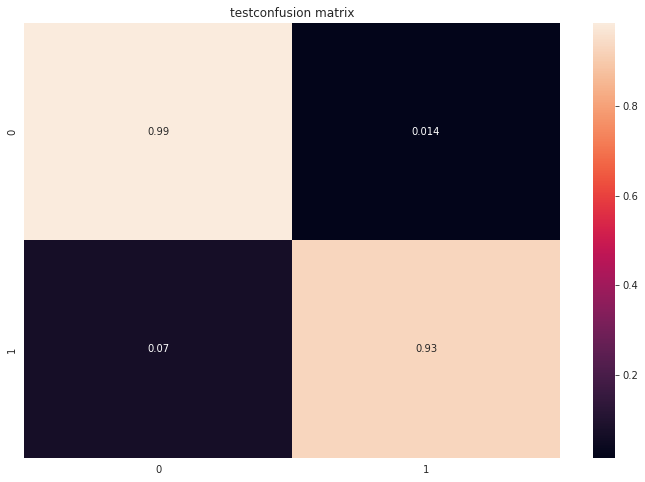

In [63]:
test_pred = predic_plot(test_df[features],test_df[target],'test')

Probando el modelo en el Test Set

In [91]:
def random_guess(input):
    return np.random.choice(['B','M'],len(input))

In [93]:
def all_b(input):
    return np.full(len(input), "B")

In [92]:
accuracy_score(test_df[target],random_guess(test_df[features]))

0.5614035087719298

In [94]:
accuracy_score(test_df[target],all_b(test_df[features]))

0.6228070175438597